In [11]:
import numpy as np
import subprocess 
import sys
import matplotlib.pyplot as plt 
%matplotlib inline

EXECUTABLE = "sort.exe"
SEPARATOR = "||"
T_FLASH_SORT = '1'
T_FLASHY_SORT = '2'
T_IS_SORTED = '1'
INT = "--int"
FLOAT = "--float"
DOUBLE = "--double"

def eval(problem_sizes, dtypeopt=FLOAT, verbose=False):
    flash_sort_times = []
    flashy_sort_times = []

    for N in problem_sizes:

        cmd = EXECUTABLE + " -s -n " + str(N) + " " + dtypeopt
        if verbose:
            print("Running:",cmd)
        outputraw = subprocess.run(cmd, capture_output=True) 
        output = {
            'code': outputraw.returncode,
            'stdout': outputraw.stdout.decode('utf-8'),
            'stderr': outputraw.stderr.decode('utf-8')
        }
        if output['stderr'] != "":   
            print("ERROR:\n",output['stderr'])
            return None 
        
        lines = output['stdout'].split('\n')
        placed = 2
        for l in lines:
            placed = 2
            tokens = l.split(SEPARATOR)
            if tokens[0] == T_FLASH_SORT:
                if tokens[1] == T_IS_SORTED:
                    flash_sort_times.append(float(tokens[2]))
                else:
                    flash_sort_times.append(-1) 
                placed-=1
            elif tokens[0] == T_FLASHY_SORT:
                if tokens[1] == T_IS_SORTED:
                    flashy_sort_times.append(float(tokens[2]))
                else:
                    flashy_sort_times.append(-1)
                placed-=1
            if placed != 0:
                print("error: ",cmd,"\n",output['stdout'])

    return flash_sort_times, flashy_sort_times




In [12]:
n = list(range(int(1e4), int(1e5), int(1e4)))
y1, y2 = eval(n, dtypeopt=DOUBLE, verbose=True)
print("done")

Running: sort.exe -s -n 10000 --double
error:  sort.exe -s -n 10000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 10000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 10000 --double 
 1||1||0
2||1||0

Running: sort.exe -s -n 20000 --double
error:  sort.exe -s -n 20000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 20000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 20000 --double 
 1||1||0
2||1||0

Running: sort.exe -s -n 30000 --double
error:  sort.exe -s -n 30000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 30000 --double 
 1||1||0
2||1||0

error:  sort.exe -s -n 30000 --double 
 1||1||0
2||1||0

Running: sort.exe -s -n 40000 --double
error:  sort.exe -s -n 40000 --double 
 1||1||1
2||1||1

error:  sort.exe -s -n 40000 --double 
 1||1||1
2||1||1

error:  sort.exe -s -n 40000 --double 
 1||1||1
2||1||1

Running: sort.exe -s -n 50000 --double
error:  sort.exe -s -n 50000 --double 
 1||1||1
2||1||2

error:  sort.exe -s -n 50000 --double 
 1||1||1
2||1||2

error: 

In [8]:
# Scatter plot of N vs Time
print(len(n), len(y1), len(y2))
_, ax = plt.subplots()
ax.scatter(n, y1, marker='.', c='red')
ax.scatter(n, y2, marker='.', c='blue') 
ax.legend(['Flash', 'Flashy'])
ax.set(title="Runtimes", xlabel='Problem Size', ylabel='Time (ms)')
plt.show()   


9 9 7


ValueError: x and y must be the same size

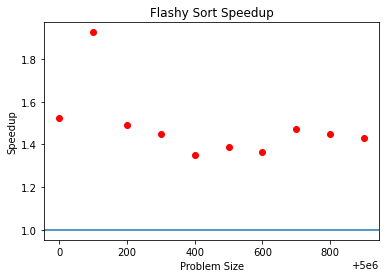

In [32]:
# Scatter plot of N vs Speedup
_, ax = plt.subplots()
y = np.array(y1)/np.array(y2)
ax.scatter(n, y, c='red') 
ax.axhline(1.0)  
ax.set(title="Flashy Sort Speedup", xlabel='Problem Size', ylabel='Speedup')
plt.show() 